In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [2]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

2025-09-16 18:02:24.728054: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758045744.925551      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758045744.990089      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [4]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'../input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [5]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [6]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [7]:
result = np.array(result)
result = result.reshape(139,2)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [11]:
y_train.shape

(111, 2)

In [16]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 8.0846e-04 - val_loss: 1.7021
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 8.8783e-05 - val_loss: 1.7632
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0875 - val_loss: 1.8005
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0020 - val_loss: 1.8268
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 3.1418e-06 - val_loss: 1.8494
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 3.2227e-06 - val_loss: 1.8743
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0086 - val_loss: 1.8830
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0194 - val_loss: 1.8619
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 5.4917e-04 - val_loss: 1.8611
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 2.1731e-04 - val_loss: 1.8733
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 2.6190e-04 - val_loss: 1.8932
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss

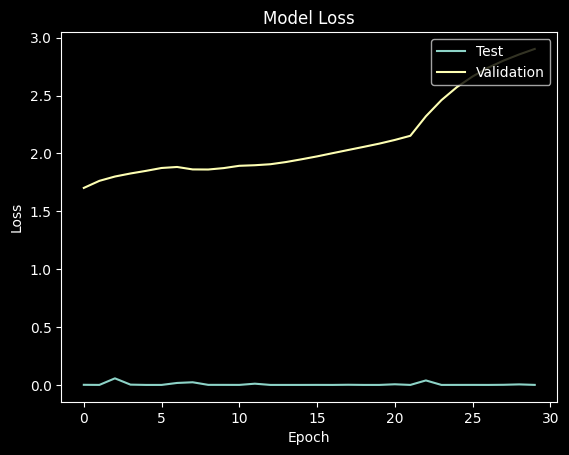

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [18]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

In [19]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is No, Its not a tumor


99.99998807907104% Confidence This Is A Its a Tumor


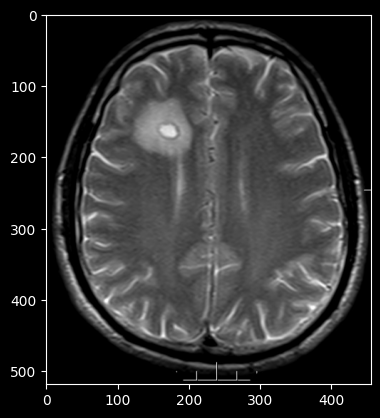

In [20]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix , classification_report  
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam , Adamax
import warnings 
warnings.filterwarnings("ignore")

In [23]:
Folder_training = '/kaggle/input/brain-tumor-mri-dataset/Training'
Path = []
Label = []

folder_path = os.listdir(Folder_training)
for img in folder_path:
    Folder_Path = os.path.join(Folder_training , img)
    Folder_Name = os.listdir(Folder_Path)
    for path in Folder_Name:
        Image_Path = os.path.join(Folder_Path , path)

        Path.append(Image_Path)
        Label.append(img)
data1 = pd.Series(Path , name='Img_Path')
data2 = pd.Series(Label , name = 'Class')
df_train = pd.concat([data1 , data2] , axis = 1)


In [24]:
df_train

Img_Path      Class
0     /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
1     /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
2     /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
3     /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
4     /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
...                                                 ...        ...
5707  /kaggle/input/brain-tumor-mri-dataset/Training...     glioma
5708  /kaggle/input/brain-tumor-mri-dataset/Training...     glioma
5709  /kaggle/input/brain-tumor-mri-dataset/Training...     glioma
5710  /kaggle/input/brain-tumor-mri-dataset/Training...     glioma
5711  /kaggle/input/brain-tumor-mri-dataset/Training...     glioma

[5712 rows x 2 columns]

In [25]:
Folder_training = '/kaggle/input/brain-tumor-mri-dataset/Testing'
Path = []
Label = []

folder_path = os.listdir(Folder_training)
for img in folder_path:
    Folder_Path = os.path.join(Folder_training , img)
    Folder_Name = os.listdir(Folder_Path)
    for path in Folder_Name:
        Image_Path = os.path.join(Folder_Path , path)

        Path.append(Image_Path)
        Label.append(img)
data1 = pd.Series(Path , name='Img_Path')
data2 = pd.Series(Label , name = 'Class')
df_test = pd.concat([data1 , data2] , axis = 1)

In [26]:
df_test

Img_Path      Class
0     /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary
1     /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary
2     /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary
3     /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary
4     /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary
...                                                 ...        ...
1306  /kaggle/input/brain-tumor-mri-dataset/Testing/...     glioma
1307  /kaggle/input/brain-tumor-mri-dataset/Testing/...     glioma
1308  /kaggle/input/brain-tumor-mri-dataset/Testing/...     glioma
1309  /kaggle/input/brain-tumor-mri-dataset/Testing/...     glioma
1310  /kaggle/input/brain-tumor-mri-dataset/Testing/...     glioma

[1311 rows x 2 columns]

In [27]:
valid_df , test_df = train_test_split(df_test , train_size = 0.5 ,shuffle= True, random_state=42)

In [28]:
df_train.columns[0]

'Img_Path'

In [29]:
batch_size = 16
image_size = (224 , 224)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_generator = tr_gen.flow_from_dataframe(
    df_train,
    x_col = df_train.columns[0],
    y_col = df_train.columns[1],
    target_size = image_size,
    class_mode = 'categorical',
    color_mode='rgb', 
    shuffle=True, 
    batch_size=batch_size
    )

valid_generator = tr_gen.flow_from_dataframe(
    valid_df,
    x_col = df_train.columns[0],
    y_col = df_train.columns[1],
    target_size = image_size,
    class_mode = 'categorical',
    color_mode='rgb', 
    shuffle=True, 
    batch_size=batch_size
)

test_generator = tr_gen.flow_from_dataframe(
    test_df,
    x_col = df_train.columns[0],
    y_col = df_train.columns[1],
    target_size = image_size,
    class_mode = 'categorical',
    color_mode='rgb', 
    shuffle=False, 
    batch_size=batch_size
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [30]:
# Dictionary mapping class names to indices
gen_dict = train_generator.class_indices
# List of class names
classes = list(gen_dict.keys())

# Fetch a batch of images and labels
images, labels = next(train_generator)

# Set up the figure size
plt.figure(figsize=(20, 20))

# Loop through the first 20 images in the batch
for i in range(16):
    plt.subplot(4, 4, i + 1)
    
    # Normalize image pixel values to [0, 1] range
    image = images[i] / 255.0
    
    # Display the image
    plt.imshow(image)
    
    # Get the class index and class name
    index = np.argmax(labels[i])  # Get image index
    class_name = classes[index]   # Get class of image
    
    # Set the title with class name
    plt.title(class_name, color='red', fontsize=20)
    plt.axis('off')

# Adjust layout for better spacing between plots
plt.tight_layout()
# Display the plot
plt.show()

In [31]:
image_size = (224,224)
channles = 3
image_shape = (image_size[0] , image_size[1] , channles)
class_count = len(list(train_generator.class_indices.keys())) 

model = Sequential([
    Conv2D(filters=64 , kernel_size=(3,3) , padding = 'same' , activation = 'relu' , input_shape = image_shape),
    Conv2D(filters=64 , kernel_size=(3,3) , padding = 'same' , activation = 'relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128 , kernel_size=(3,3) , padding = 'same' , activation = 'relu' ),
    Conv2D(filters=128 , kernel_size=(3,3) , padding = 'same' , activation = 'relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256 , kernel_size=(3,3) , padding = 'same' , activation = 'relu' ),
    Conv2D(filters=256 , kernel_size=(3,3) , padding = 'same' , activation = 'relu'),
    Conv2D(filters=256 , kernel_size=(3,3) , padding = 'same' , activation = 'relu' ),
    MaxPooling2D((2, 2)),
     Conv2D(filters=512 , kernel_size=(3,3) , padding = 'same' , activation = 'relu' ),
    Conv2D(filters=512 , kernel_size=(3,3) , padding = 'same' , activation = 'relu'),
    Conv2D(filters=512 , kernel_size=(3,3) , padding = 'same' , activation = 'relu' ),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512 , kernel_size=(3,3) , padding = 'same' , activation = 'relu' ),
    Conv2D(filters=512 , kernel_size=(3,3) , padding = 'same' , activation = 'relu'),
    Conv2D(filters=512 , kernel_size=(3,3) , padding = 'same' , activation = 'relu' ),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(256 , activation='relu'),
    Dense(64 , activation = 'relu'),
    Dense(class_count , activation = 'softmax')
])

model.compile(Adamax(learning_rate = 0.01) , loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,154,180 (80.70 MB)

 Trainable params: 21,154,180 (80.70 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(train_generator , epochs= 12 , verbose=1 , validation_data = valid_generator , shuffle=False)

Epoch 1/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 147s 324ms/step - accuracy: 0.2637 - loss: 5517259264.0000 - val_accuracy: 0.3008 - val_loss: 1.3825
Epoch 2/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 96s 268ms/step - accuracy: 0.2826 - loss: 1.3830 - val_accuracy: 0.3008 - val_loss: 1.3835
Epoch 3/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 96s 268ms/step - accuracy: 0.2724 - loss: 1.3844 - val_accuracy: 0.3008 - val_loss: 1.3807
Epoch 4/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 96s 268ms/step - accuracy: 0.2686 - loss: 1.3861 - val_accuracy: 0.3008 - val_loss: 1.3811
Epoch 5/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 96s 268ms/step - accuracy: 0.2685 - loss: 1.3850 - val_accuracy: 0.3008 - val_loss: 1.3811
Epoch 6/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 96s 268ms/step - accuracy: 0.2775 - loss: 1.3839 - val_accuracy: 0.3008 - val_loss: 1.3830
Epoch 7/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 96s 268ms/step - accuracy: 0.2887 - loss: 1.3828 - val_accuracy: 0.3008 - val_loss: 1.3837
Epoch 8/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 96s 268ms/step - accuracy: 0.2805

In [35]:
train_score = model.evaluate(train_generator, verbose= 1)
valid_score = model.evaluate(valid_generator, verbose= 1)
test_score = model.evaluate(test_generator, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - accuracy: 0.2815 - loss: 1.3835
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.2664 - loss: 1.3891
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.3141 - loss: 1.3781
Train Loss:  1.3836594820022583
Train Accuracy:  0.27923670411109924
--------------------
Validation Loss:  1.381026268005371
Validation Accuracy:  0.3007633686065674
--------------------
Test Loss:  1.3771770000457764
Test Accuracy:  0.31707316637039185


In [36]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

In [37]:
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step


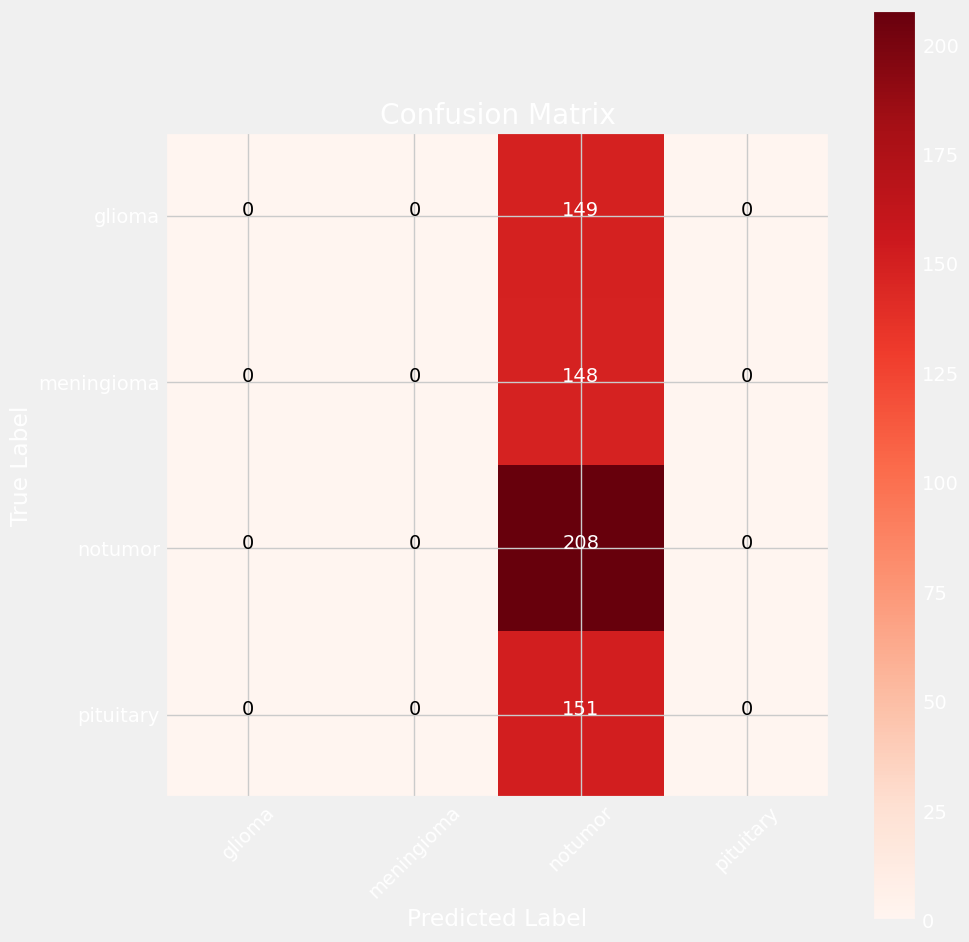

In [38]:
# Generate the class labels
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap='Reds')  # Use red colormap
plt.title('Confusion Matrix',color='white')
plt.colorbar()

# Set tick marks and labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes,color='white')

# Add text annotations
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [39]:
print(classification_report(test_generator.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00       149
  meningioma       0.00      0.00      0.00       148
     notumor       0.32      1.00      0.48       208
   pituitary       0.00      0.00      0.00       151

    accuracy                           0.32       656
   macro avg       0.08      0.25      0.12       656
weighted avg       0.10      0.32      0.15       656



In [11]:
# For Data Processing
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img
# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random

In [12]:
train_dir = r'../input/brain-tumor-mri-dataset/Training'
test_dir = '../input/brain-tumor-mri-dataset/Testing'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+"//" +label):
        train_paths.append(train_dir + '//'+label+ '//'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

In [13]:
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+ '//' + label):
        test_paths.append(test_dir +'//'+label + '//'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

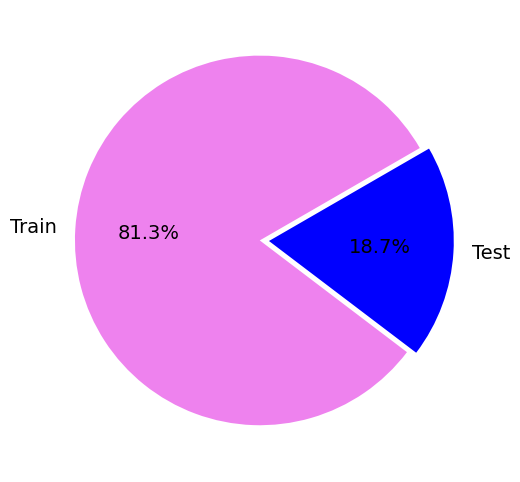

In [14]:
plt.figure(figsize=(14,6))
colors = ['Violet' , 'Blue']
plt.rcParams.update({'font.size': 14})
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);

In [15]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Sharpness(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image

In [16]:
IMAGE_SIZE = 128


def open_images(paths):

    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)
images = open_images(train_paths[50:59])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()

In [17]:
unique_labels = os.listdir(train_dir)

def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

In [18]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758054040.999246      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758054041.000022      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       401,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 439,348 (1.68 MB)

 Trainable params: 439,348 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

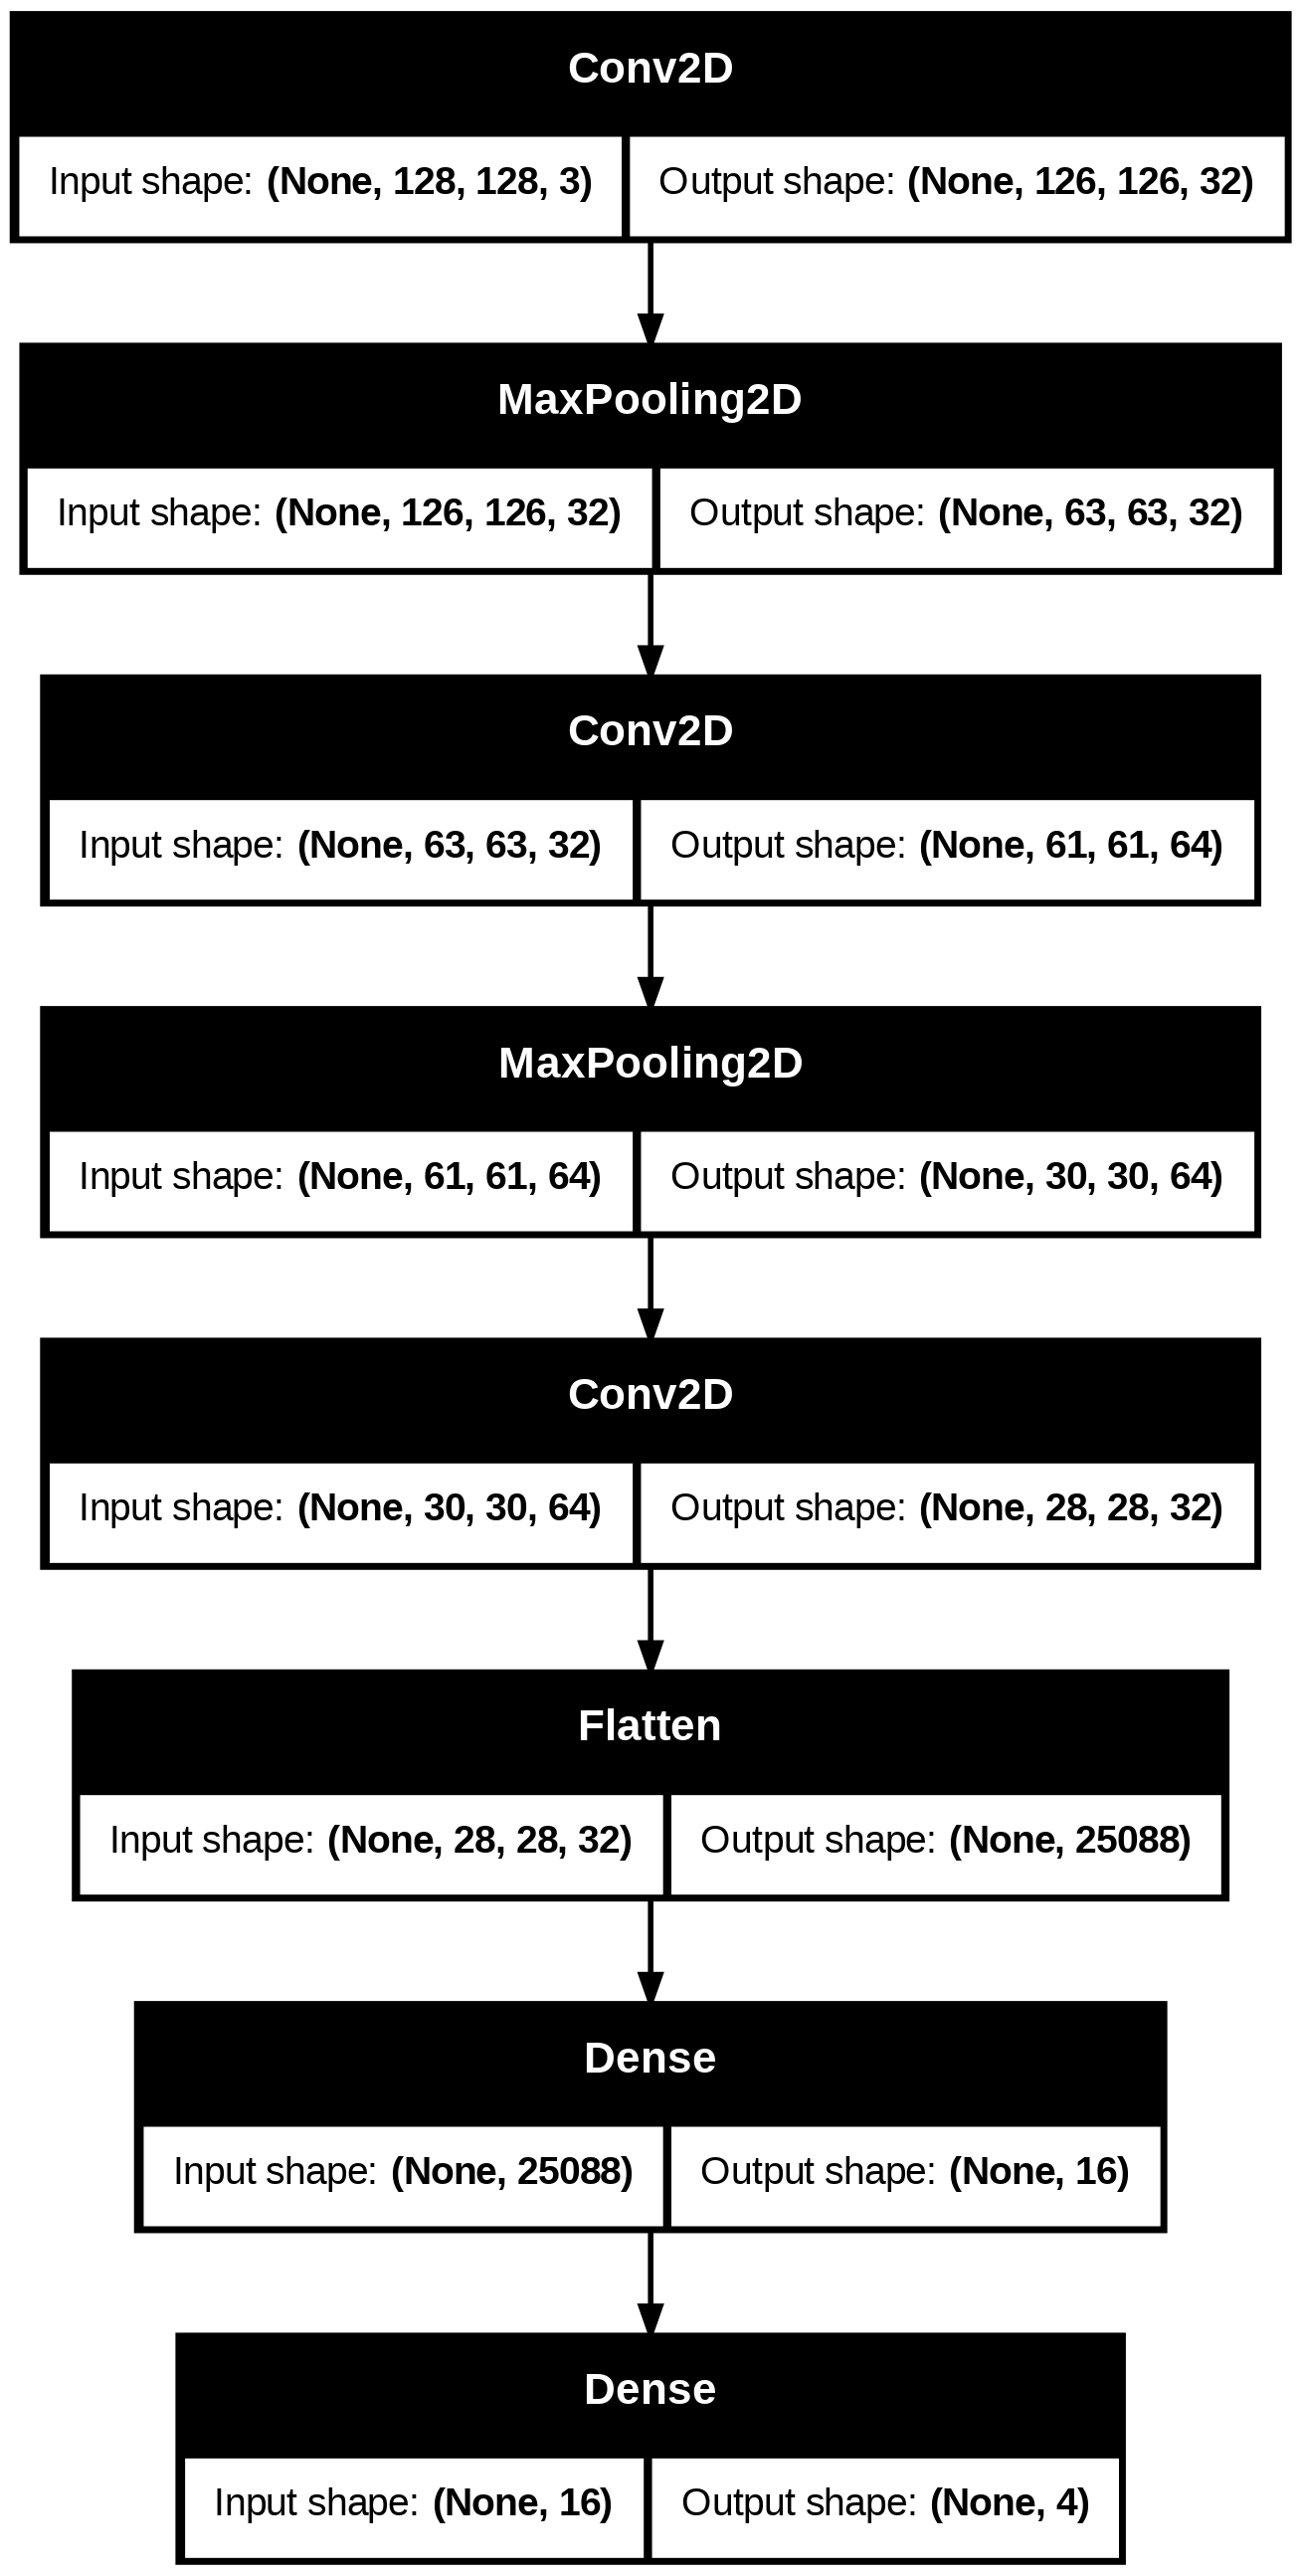

In [19]:
keras.utils.plot_model(model, show_shapes=True)

In [62]:
model.fit(datagen(train_paths, train_labels, batch_size=32, epochs=10), steps_per_epoch=len(train_paths)//32, epochs=10)

Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.5606 - loss: 1.0564
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.7791 - loss: 0.5621
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.8408 - loss: 0.4463
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.8663 - loss: 0.3429
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 18s 99ms/step - accuracy: 0.8954 - loss: 0.2751
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9133 - loss: 0.2434
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9257 - loss: 0.2001
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.9481 - loss: 0.1479
Epoch 9/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9470 - loss: 0.1432
Epoch 10/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9568 - loss: 0.1265


In [22]:
train_loss, train_acc = model.evaluate(open_images(train_paths), encode_label(train_labels))
test_loss, test_acc = model.evaluate(open_images(test_paths), encode_label(test_labels))

print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2845 - loss: 1.3878
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2379 - loss: 1.3925
Train accuracy: 0.2767857015132904
Test accuracy: 0.24866513907909393


In [24]:
predictions = model.predict(open_images(test_paths))
predictions = np.argmax(predictions, axis=1)
print(classification_report(encode_label(test_labels), predictions, target_names=unique_labels))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

   pituitary       0.36      0.38      0.37       300
     notumor       0.00      0.00      0.00       405
  meningioma       0.23      0.52      0.32       306
      glioma       0.17      0.18      0.18       300

    accuracy                           0.25      1311
   macro avg       0.19      0.27      0.22      1311
weighted avg       0.18      0.25      0.20      1311



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
base_model = VGG16(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

model = Sequential()
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(unique_labels), activation='softmax'))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,908 (60.13 MB)

 Trainable params: 8,128,644 (31.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

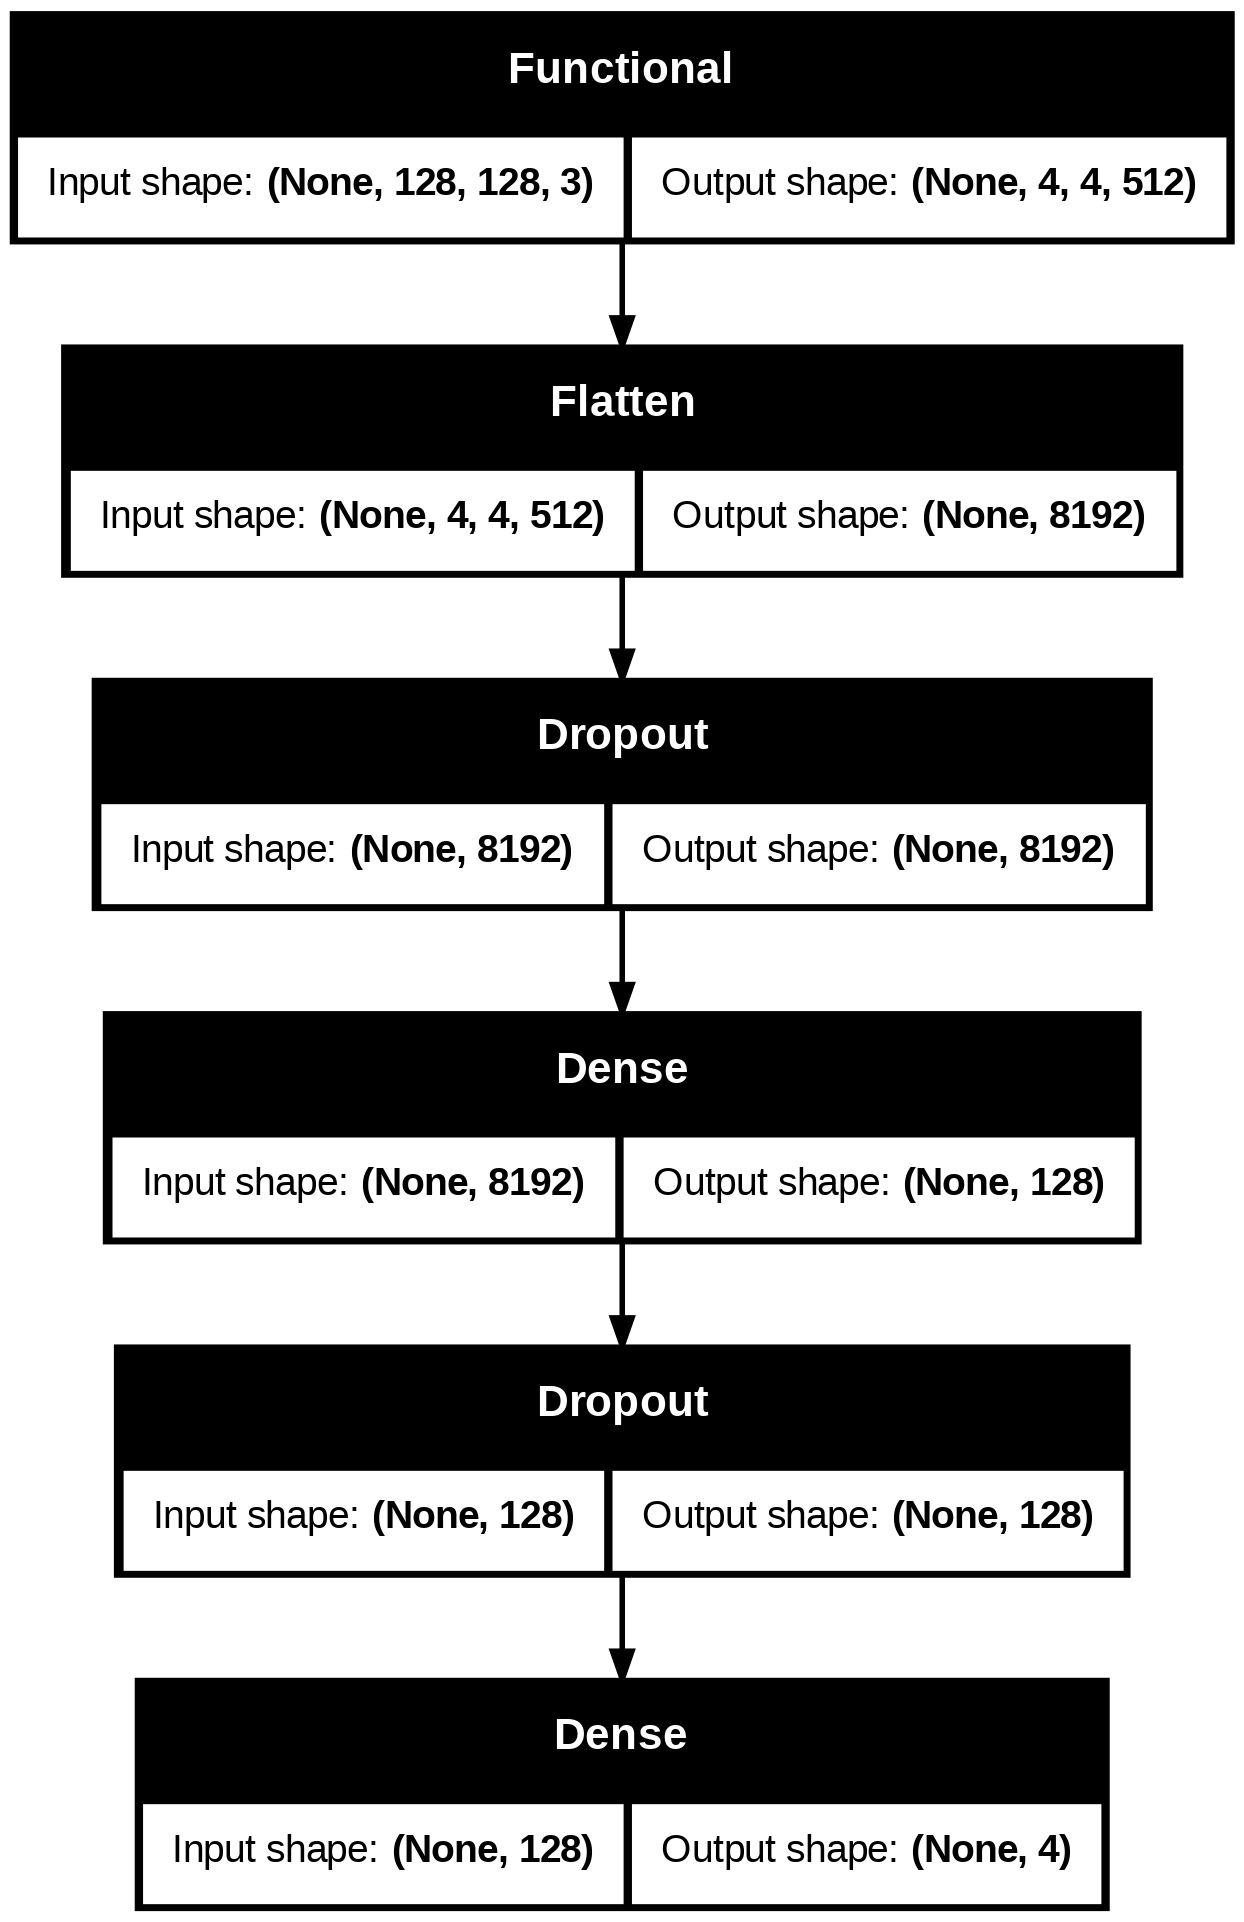

In [27]:
keras.utils.plot_model(model, show_shapes=True)

In [28]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [29]:
batch_size = 20
steps = int(len(train_paths)/batch_size)
epochs = 5
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 31s 76ms/step - loss: 0.6680 - sparse_categorical_accuracy: 0.7303
Epoch 2/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - loss: 0.2689 - sparse_categorical_accuracy: 0.8957
Epoch 3/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 22s 76ms/step - loss: 0.1761 - sparse_categorical_accuracy: 0.9354
Epoch 4/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - loss: 0.1144 - sparse_categorical_accuracy: 0.9584
Epoch 5/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - loss: 0.0913 - sparse_categorical_accuracy: 0.9691


In [30]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [31]:
batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1), total=steps):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

  0%|          | 0/40 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


  2%|▎         | 1/40 [00:06<04:11,  6.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  5%|▌         | 2/40 [00:06<01:45,  2.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  8%|▊         | 3/40 [00:06<00:59,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 10%|█         | 4/40 [00:07<00:38,  1.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▎        | 5/40 [00:07<00:26,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 15%|█▌        | 6/40 [00:07<00:19,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 18%|█▊        | 7/40 [00:07<00:15,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 20%|██        | 8/40 [00:08<00:12,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▎       | 9/40 [00:08<00:10,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 25%|██▌       | 10/40 [00:08<00:09,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 28%|██▊       | 11/40 [00:08<00:08,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 30%|███       | 12/40 [00:09<00:07,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 32%|███▎      | 13/40 [00:09<00:07,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 35%|███▌      | 14/40 [00:09<00:07,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 38%|███▊      | 15/40 [00:09<00:06,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 40%|████      | 16/40 [00:10<00:06,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 42%|████▎     | 17/40 [00:10<00:06,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 45%|████▌     | 18/40 [00:10<00:06,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 48%|████▊     | 19/40 [00:10<00:05,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 50%|█████     | 20/40 [00:11<00:05,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 52%|█████▎    | 21/40 [00:11<00:05,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 55%|█████▌    | 22/40 [00:11<00:04,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 57%|█████▊    | 23/40 [00:11<00:04,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 60%|██████    | 24/40 [00:12<00:04,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 62%|██████▎   | 25/40 [00:12<00:03,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 65%|██████▌   | 26/40 [00:12<00:03,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 68%|██████▊   | 27/40 [00:13<00:03,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 70%|███████   | 28/40 [00:13<00:03,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 72%|███████▎  | 29/40 [00:13<00:02,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 75%|███████▌  | 30/40 [00:13<00:02,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 78%|███████▊  | 31/40 [00:14<00:02,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 80%|████████  | 32/40 [00:14<00:02,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 82%|████████▎ | 33/40 [00:14<00:01,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 85%|████████▌ | 34/40 [00:14<00:01,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 88%|████████▊ | 35/40 [00:15<00:01,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 90%|█████████ | 36/40 [00:15<00:01,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 92%|█████████▎| 37/40 [00:15<00:00,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 95%|█████████▌| 38/40 [00:15<00:00,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 98%|█████████▊| 39/40 [00:16<00:00,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


100%|██████████| 40/40 [00:16<00:00,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


41it [00:23,  1.74it/s]                        


In [32]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      glioma       0.96      0.87      0.91       300
  meningioma       0.86      0.97      0.91       306
     notumor       1.00      0.97      0.98       405
   pituitary       0.99      0.98      0.98       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



In [33]:
# build inception model
base_model = InceptionV3(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True
base_model.layers[-5].trainable = True
model = Sequential()
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(unique_labels), activation='softmax'))

model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 2, 2, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,885,540 (87.30 MB)

 Trainable params: 1,082,756 (4.13 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

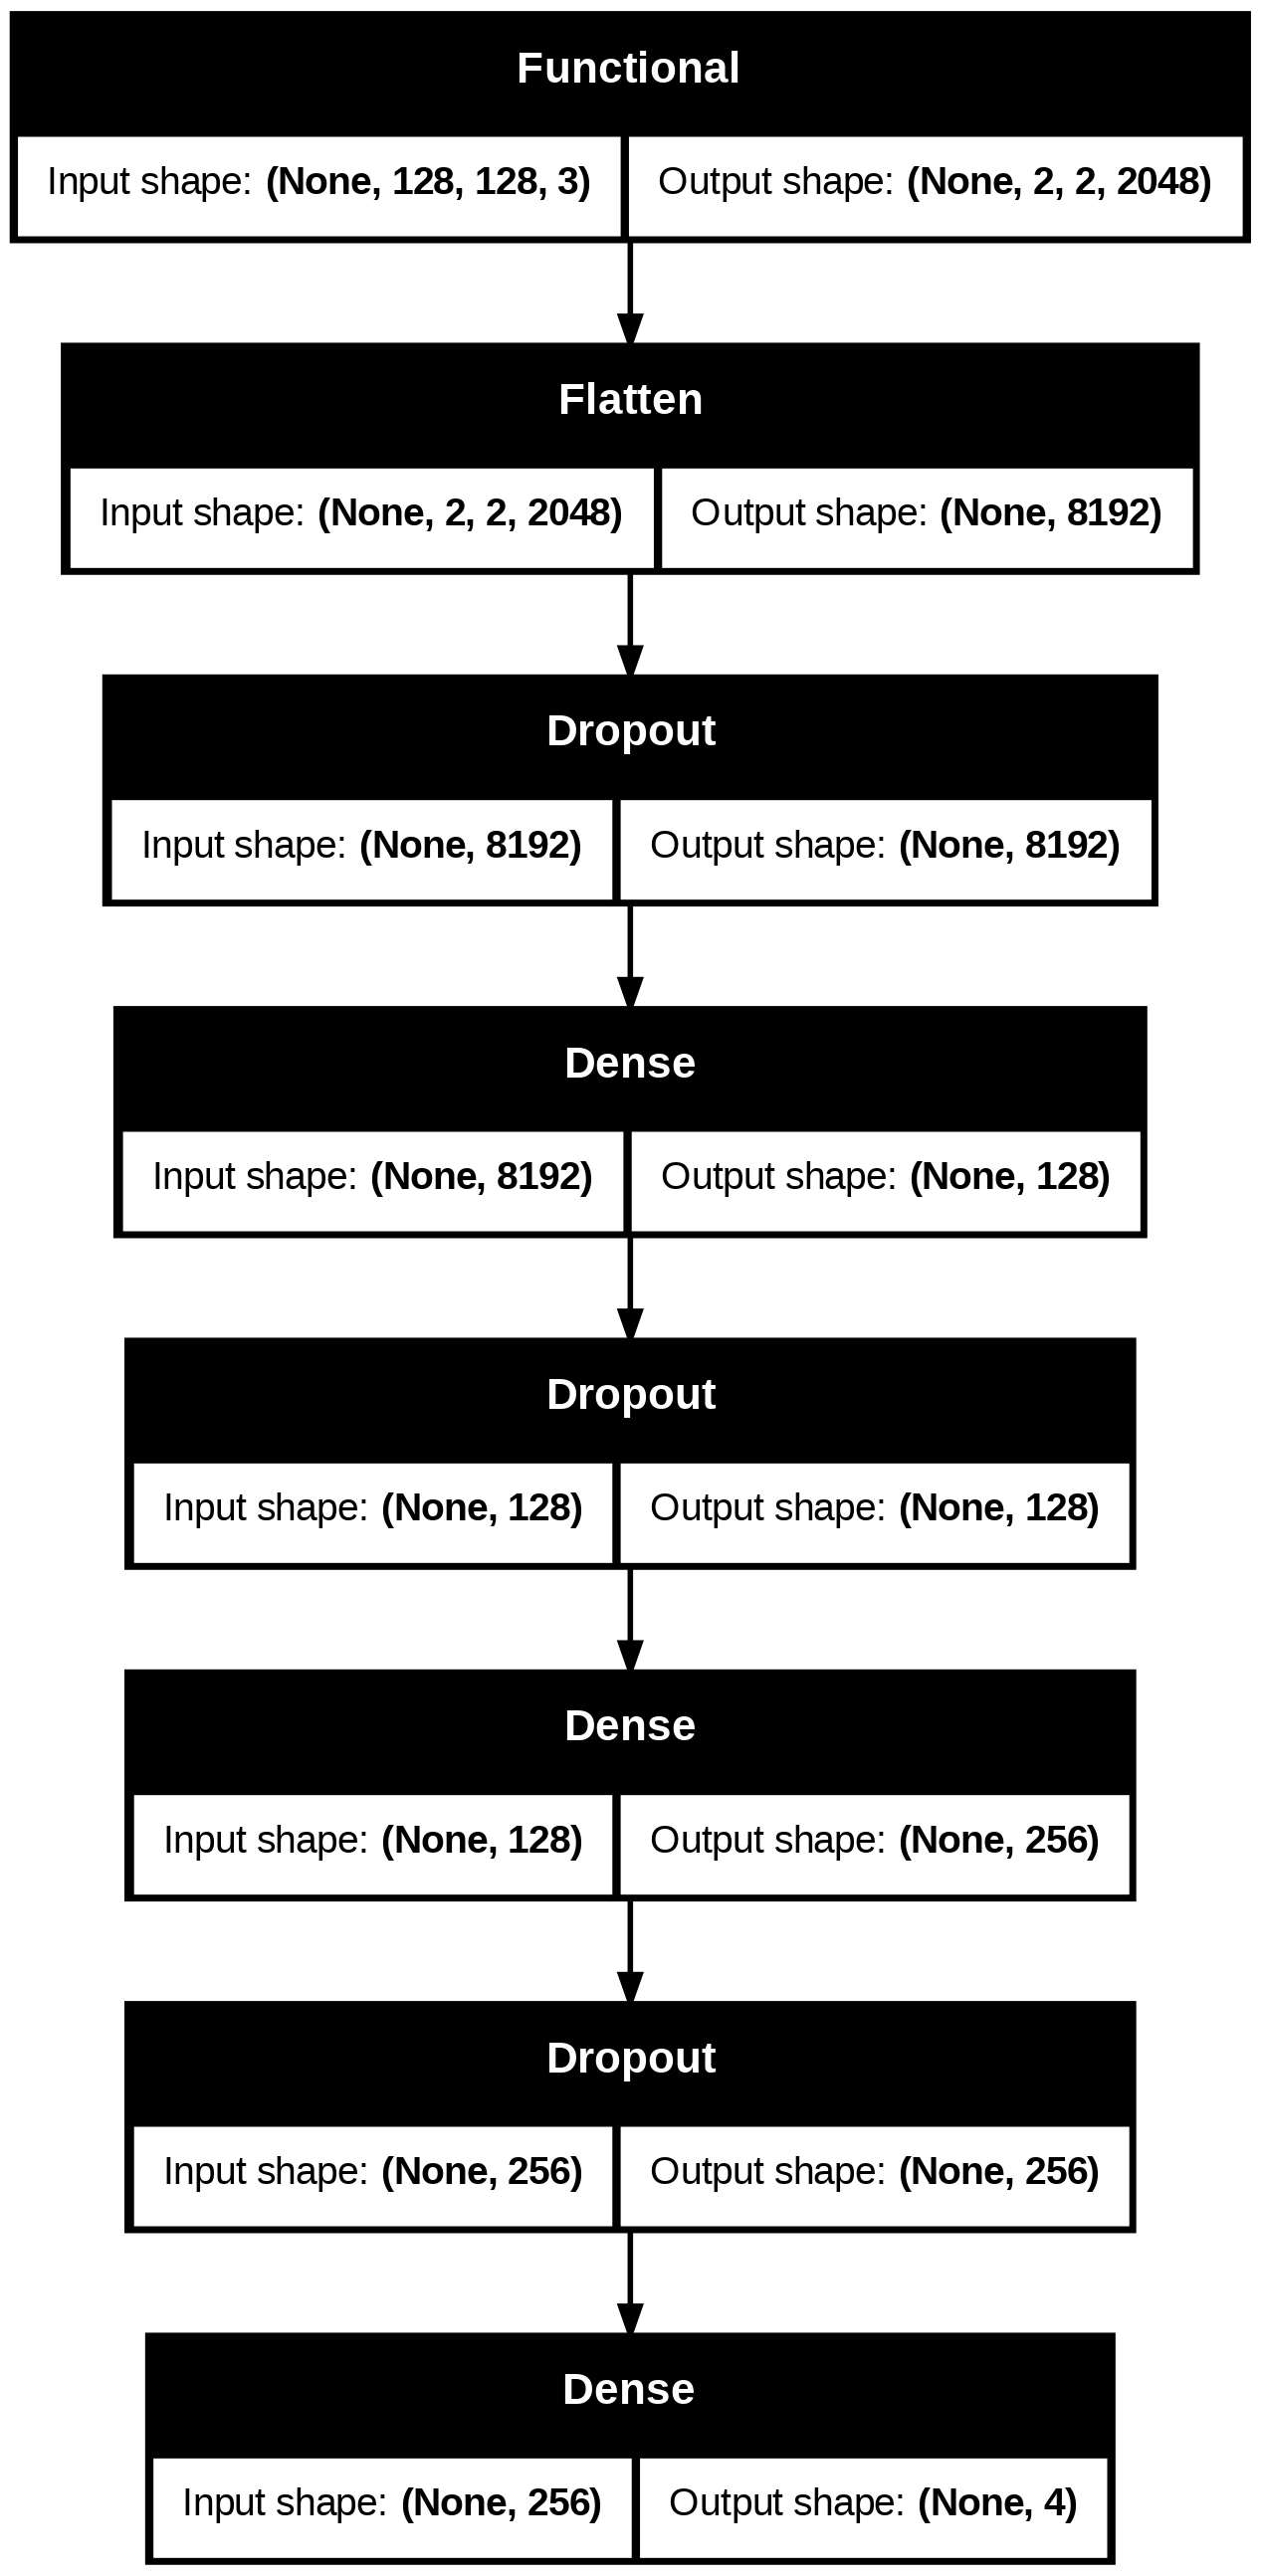

In [34]:
keras.utils.plot_model(model, show_shapes=True)

In [35]:
model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

batch_size = 20
steps = int(len(train_paths)/batch_size)
epochs = 8
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/8
285/285 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - loss: 1.2000 - sparse_categorical_accuracy: 0.5495
Epoch 2/8
285/285 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - loss: 0.5912 - sparse_categorical_accuracy: 0.7767
Epoch 3/8
285/285 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - loss: 0.4718 - sparse_categorical_accuracy: 0.8219
Epoch 4/8
285/285 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - loss: 0.3990 - sparse_categorical_accuracy: 0.8503
Epoch 5/8
285/285 ━━━━━━━━━━━━━━━━━━━━ 22s 76ms/step - loss: 0.3679 - sparse_categorical_accuracy: 0.8598
Epoch 6/8
285/285 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - loss: 0.3027 - sparse_categorical_accuracy: 0.8834
Epoch 7/8
285/285 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - loss: 0.2913 - sparse_categorical_accuracy: 0.8913
Epoch 8/8
285/285 ━━━━━━━━━━━━━━━━━━━━ 22s 76ms/step - loss: 0.2707 - sparse_categorical_accuracy: 0.8964


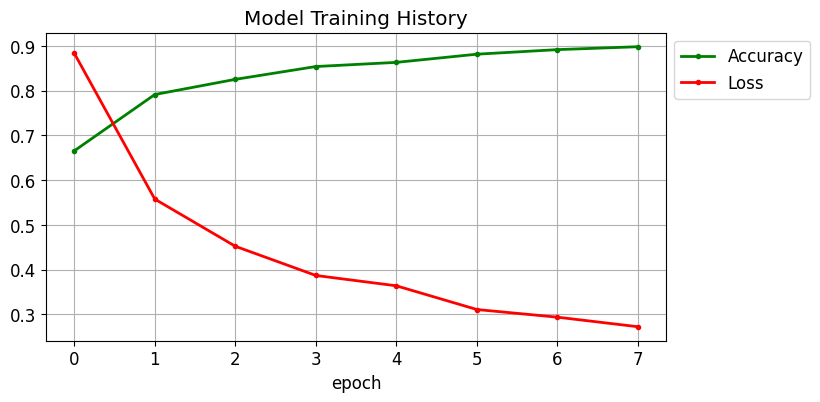

In [36]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [37]:
# Evaluate model with test data
batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1), total=steps):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

  0%|          | 0/40 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


  2%|▎         | 1/40 [00:09<05:54,  9.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  5%|▌         | 2/40 [00:09<02:27,  3.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  8%|▊         | 3/40 [00:09<01:21,  2.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 10%|█         | 4/40 [00:09<00:51,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 12%|█▎        | 5/40 [00:09<00:34,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 15%|█▌        | 6/40 [00:10<00:24,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 18%|█▊        | 7/40 [00:10<00:18,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 20%|██        | 8/40 [00:10<00:14,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 22%|██▎       | 9/40 [00:10<00:11,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 25%|██▌       | 10/40 [00:11<00:09,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 28%|██▊       | 11/40 [00:11<00:08,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 30%|███       | 12/40 [00:11<00:07,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 32%|███▎      | 13/40 [00:11<00:06,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 35%|███▌      | 14/40 [00:11<00:06,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 38%|███▊      | 15/40 [00:12<00:05,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 40%|████      | 16/40 [00:12<00:05,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 42%|████▎     | 17/40 [00:12<00:05,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 45%|████▌     | 18/40 [00:12<00:04,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 48%|████▊     | 19/40 [00:13<00:04,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 50%|█████     | 20/40 [00:13<00:04,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 52%|█████▎    | 21/40 [00:13<00:04,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 55%|█████▌    | 22/40 [00:13<00:03,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 57%|█████▊    | 23/40 [00:13<00:03,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 60%|██████    | 24/40 [00:14<00:03,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 62%|██████▎   | 25/40 [00:14<00:03,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 65%|██████▌   | 26/40 [00:14<00:03,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 68%|██████▊   | 27/40 [00:14<00:02,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 70%|███████   | 28/40 [00:14<00:02,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 72%|███████▎  | 29/40 [00:15<00:02,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 75%|███████▌  | 30/40 [00:15<00:02,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 78%|███████▊  | 31/40 [00:15<00:01,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 80%|████████  | 32/40 [00:15<00:01,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 82%|████████▎ | 33/40 [00:16<00:01,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 85%|████████▌ | 34/40 [00:16<00:01,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 88%|████████▊ | 35/40 [00:16<00:01,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 90%|█████████ | 36/40 [00:16<00:00,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 92%|█████████▎| 37/40 [00:16<00:00,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 95%|█████████▌| 38/40 [00:17<00:00,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 98%|█████████▊| 39/40 [00:17<00:00,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


100%|██████████| 40/40 [00:17<00:00,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


41it [00:26,  1.53it/s]                        


In [39]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      glioma       0.90      0.82      0.86       300
  meningioma       0.82      0.75      0.78       306
     notumor       0.96      0.98      0.97       405
   pituitary       0.84      0.97      0.90       300

    accuracy                           0.89      1311
   macro avg       0.88      0.88      0.88      1311
weighted avg       0.89      0.89      0.88      1311



In [40]:
from sklearn.metrics import classification_report, accuracy_score

# Print classification report
print(classification_report(y_true, y_pred, target_names=unique_labels))

# Print final accuracy
final_accuracy = accuracy_score(y_true, y_pred)
print(f"Final Accuracy: {final_accuracy:.4f}")


              precision    recall  f1-score   support

   pituitary       0.90      0.82      0.86       300
     notumor       0.82      0.75      0.78       306
  meningioma       0.96      0.98      0.97       405
      glioma       0.84      0.97      0.90       300

    accuracy                           0.89      1311
   macro avg       0.88      0.88      0.88      1311
weighted avg       0.89      0.89      0.88      1311

Final Accuracy: 0.8863
